### Benjamin Bartek bbartek@my365.bellevue.edu
### DSC550-T302 Data Preparation (2243-1)
### Term Project

## Milestone 1

### 1. 250-500 Word Overview

Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model.

I chose a data set from the UC Irvine Machine Learning Repository titled “Autistic Spectrum Disorder Screening Data for Children” by Fadi Thabtah. The abstract for the data set states that “Autistic Spectrum Disorder (ASD) is a neurodevelopment  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these[,]” and “[t]he economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods.” Healthcare providers, insurance companies, patients, and their families would all benefit from a screening tool that is derived from data.

The goal of this project is not to create the screening tool itself. Rather, the goal is to use statistical modeling to evaluate whether there are meaningful relationships between the variables in the data set, while also demonstrating the techniques learned in class. The chosen data set contains 22 columns and 292 rows. 
Thabtah’s table describing the attributes, titled “Attribute Information”, appears below. The data set relates to children between the ages of 4 and 11. The abstract states that there are “…ten behavioural features (AQ-10-Child) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.” So, while the data set does not state what the questions were, it is clear that the questions relate to behavioral characteristics that were reported by the patient, their parent, a caregiver, or medical professional. It is not clear why the author describes ten individual characteristics based on the listed attributes. Moreover, attributes such as “Who is completing the test”, “Country of residence”, “Used the screening app before” and “Screening Method Type” should not have any predictive value at all. However, the data set contains more columns that what are described in the list of attributes.


For the first milestone, I began to evaluate the data visually with histograms, bar charts, Pearson rankings, parralel coordinates, and stacked bar charts.


Source: Thabtah, Fadi. (2017). Autistic Spectrum Disorder Screening Data for Children. UCI Machine Learning Repository. https://doi.org/10.24432/C5659W. https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children

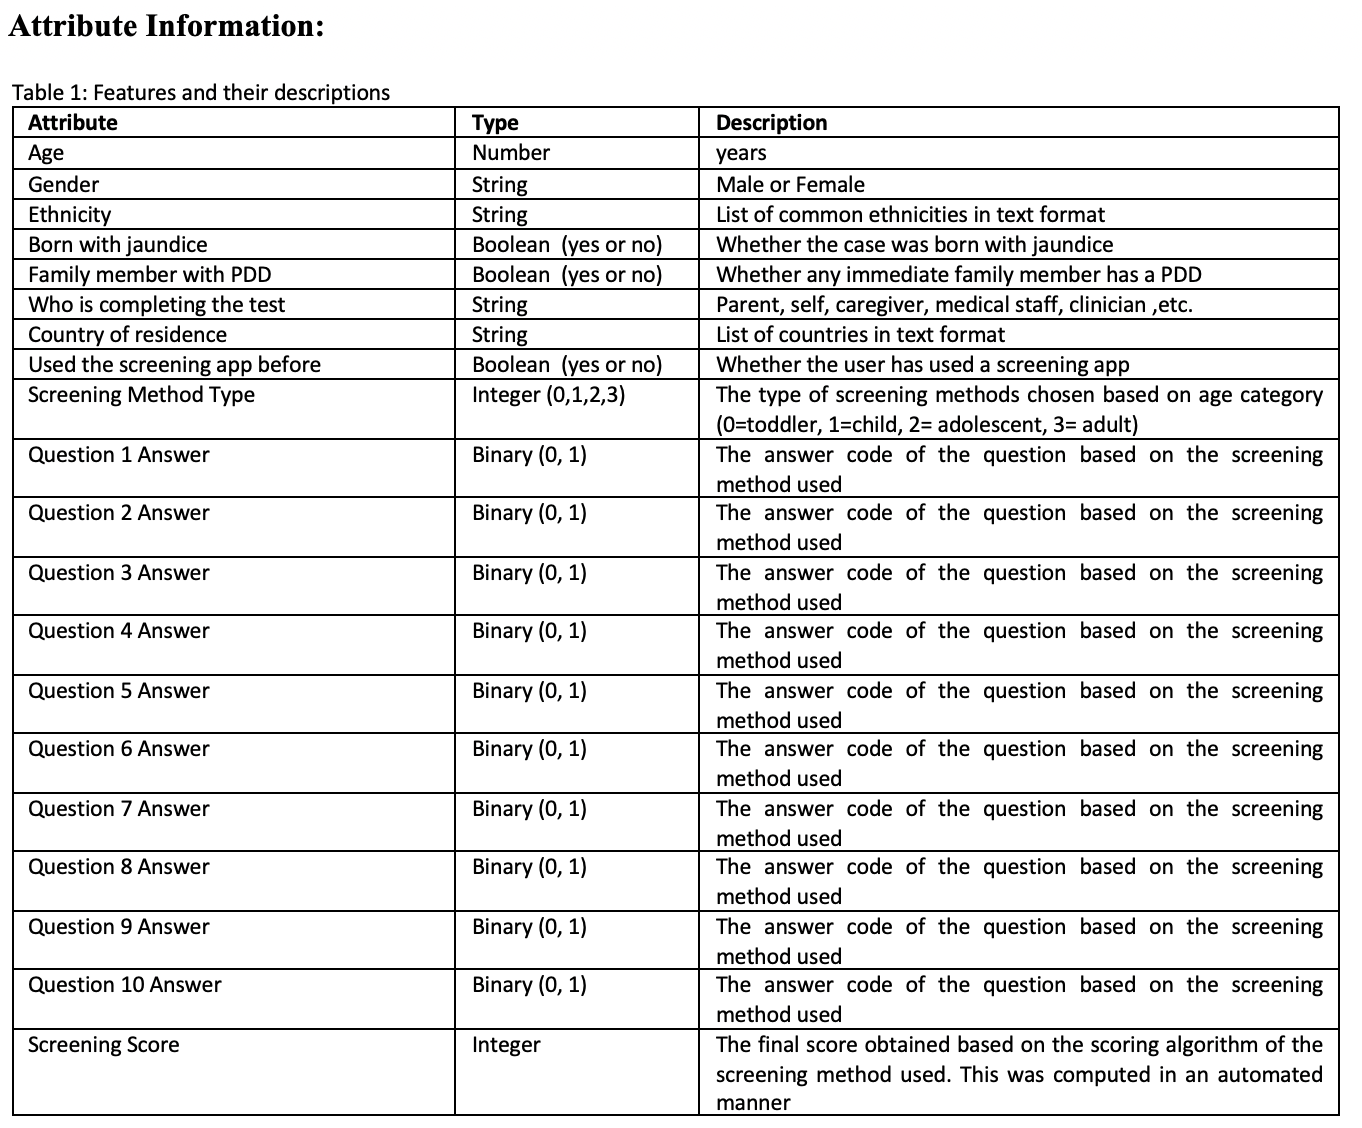

In [41]:
from IPython import display
display.Image("Attributes.png", width=600, height=600)

### 2. Graphical Analysis

Create a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing. 

In [42]:
#Imports
import pandas as pd
#!pip install yellowbrick
import yellowbrick
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Load the autism child data into a dataframe and view the first 10 rows.

autism_file = "Autism-Child-Data.csv"
data = pd.read_csv(autism_file)

data.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,relative/ASD
0,1,1,0,0,1,1,0,1,0,0,...,Others,0,0,Jordan,0,5,'4-11 years',Parent,0,no
1,1,1,0,0,1,1,0,1,0,0,...,'Middle Eastern ',0,0,Jordan,0,5,'4-11 years',Parent,0,no
2,1,1,0,0,0,1,1,1,0,0,...,NaN,0,0,Jordan,1,5,'4-11 years',NaN,0,no
3,0,1,0,0,1,1,0,0,0,1,...,NaN,1,0,Jordan,0,4,'4-11 years',NaN,0,no
4,1,1,1,1,1,1,1,1,1,1,...,Others,1,0,'United States',0,10,'4-11 years',Parent,1,yes
5,0,0,1,0,1,1,0,1,0,1,...,NaN,0,1,Egypt,0,5,'4-11 years',NaN,0,no
6,1,0,1,1,1,1,0,1,0,1,...,White-European,0,0,'United Kingdom',0,7,'4-11 years',Parent,1,yes
7,1,1,1,1,1,1,1,1,0,0,...,'Middle Eastern ',0,0,Bahrain,0,8,'4-11 years',Parent,1,yes
8,1,1,1,1,1,1,1,0,0,0,...,'Middle Eastern ',0,0,Bahrain,0,7,'4-11 years',Parent,1,yes
9,0,0,1,1,1,0,1,1,0,0,...,NaN,0,1,Austria,0,5,'4-11 years',NaN,0,no


In [44]:
#Get the dimensions of the dataframe.
print("Dataframe Dimensions: ", data.shape)

Dataframe Dimensions:  (292, 22)


In [45]:
#Summarize and describe the variables.
print("Summarized Data")
print(data.describe(include=['O']))

print("\n\nDescribe Data")
print(data.describe())


Summarized Data
       gender       ethnicity     contry_of_res      age_desc relation  \
count     292             249               292           292      249   
unique      2              10                52             1        5   
top         m  White-European  'United Kingdom'  '4-11 years'   Parent   
freq      208             108                49           292      214   

       relative/ASD  
count           292  
unique            2  
top              no  
freq            151  


Describe Data
         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.633562    0.534247    0.743151    0.551370    0.743151    0.712329   
std      0.482658    0.499682    0.437646    0.498208    0.437646    0.453454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
5

### Histograms

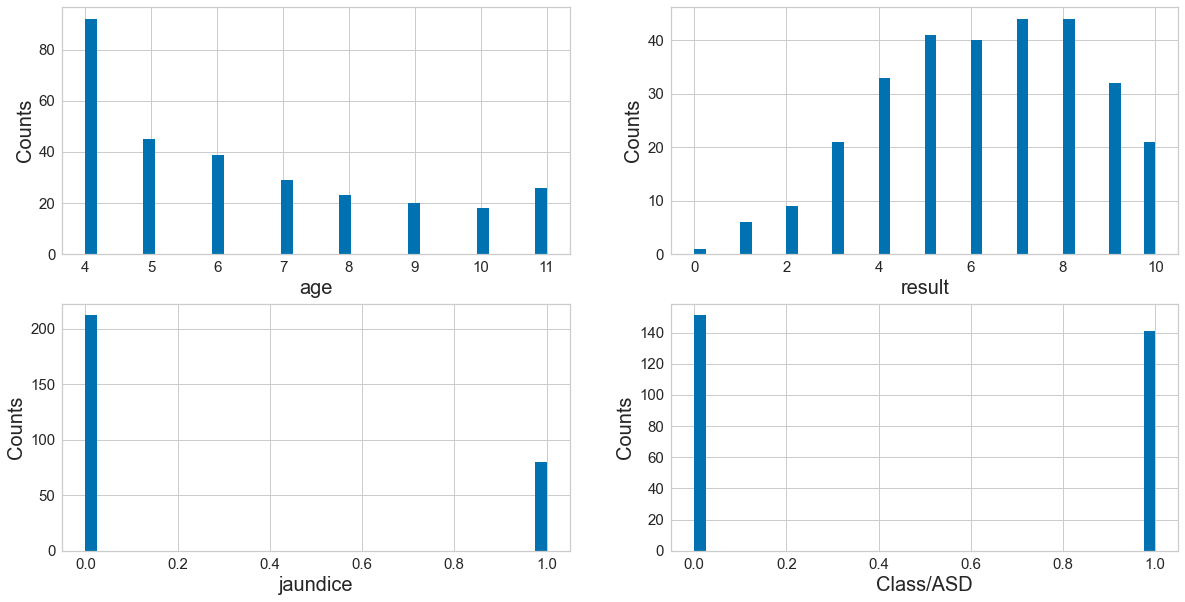

In [46]:
#Set the figure size.
plt.rcParams['figure.figsize'] = (20, 10)

#Create subplots.
fig, axes = plt.subplots(nrows = 2, ncols = 2)

#Define the features of interest.
num_features = ['age', 'result', 'jaundice', 'Class/ASD']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

#Draw histograms.
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

### Bar Charts

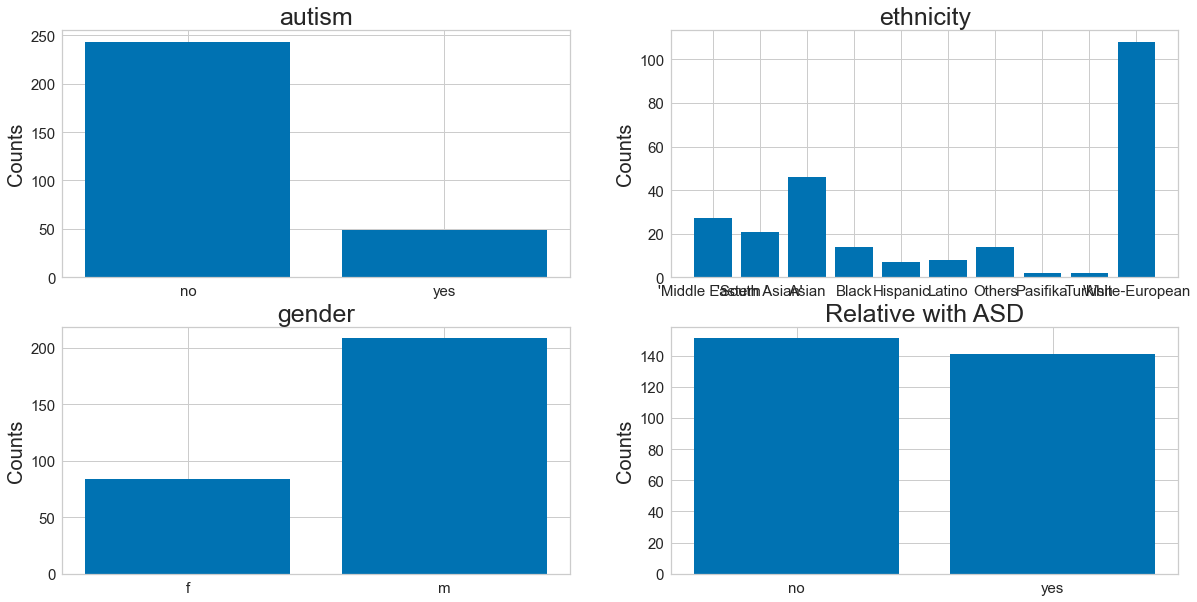

In [47]:
#Barcharts

#Set the figure size.
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

#Create subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)


X_autism = data.replace({'autism': {1: 'yes', 0: 'no'}}).groupby('autism').size().reset_index(name='Counts')['autism']
Y_autism = data.replace({'autism': {1: 'yes', 0: 'no'}}).groupby('autism').size().reset_index(name='Counts')['Counts']

#Autism bar plot
axes[0, 0].bar(X_autism, Y_autism)
axes[0, 0].set_title('autism', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


X_ethnicity = data.groupby('ethnicity').size().reset_index(name='Counts')['ethnicity']
Y_ethnicity = data.groupby('ethnicity').size().reset_index(name='Counts')['Counts']

#Ethnicity bar plot
axes[0, 1].bar(X_ethnicity, Y_ethnicity)
axes[0, 1].set_title('ethnicity', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


X_gender = data.groupby('gender').size().reset_index(name='Counts')['gender']
Y_gender = data.groupby('gender').size().reset_index(name='Counts')['Counts']

#Gender bar plot
axes[1, 0].bar(X_gender, Y_gender)
axes[1, 0].set_title('gender', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


X_ASD = data.replace({'Class/ASD': {1: 'yes', 0: 'no'}}).groupby('Class/ASD').size().reset_index(name='Counts')['Class/ASD']
Y_ASD = data.replace({'Class/ASD': {1: 'yes', 0: 'no'}}).groupby('Class/ASD').size().reset_index(name='Counts')['Counts']

#Relative with ASD bar plot
axes[1, 1].bar(X_ASD, Y_ASD)
axes[1, 1].set_title('Relative with ASD', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

### Pearson Ranking Using 'age', 'result', 'jaundice', and 'Class/ASD'

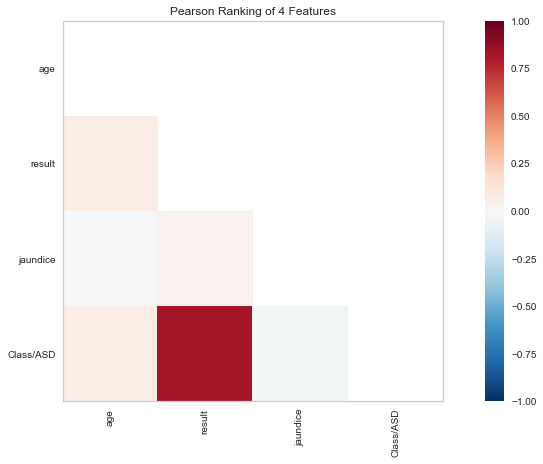

In [48]:
#Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

#Define the features to test for correlation
num_features = ['age', 'result', 'jaundice', 'Class/ASD']

#Extract the numpy arrays from the data frame
X = data[num_features].values

#Visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)               
visualizer.transform(X)            
visualizer.poof(outpath="pcoords1.png")

plt.show()

### Pearson Ranking Using Answer Scores to Questions

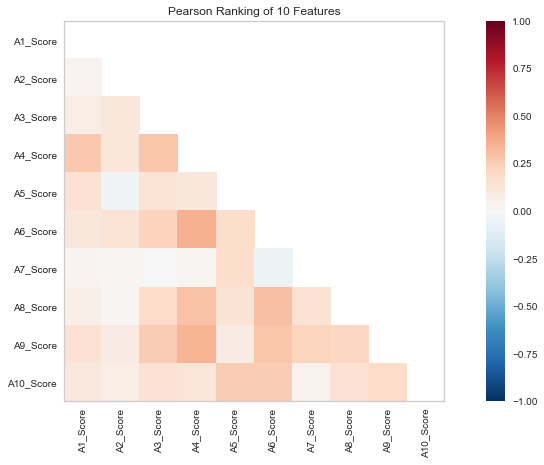

In [49]:
#Set the figure size
plt.rcParams['figure.figsize'] = (15, 7)

#Scores for the answers to the 10 questions
num_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score','A8_Score','A9_Score','A10_Score']

#Extract the numpy arrays from the data frame
X = data[num_features].values

#Visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)            
visualizer.transform(X)           
visualizer.poof(outpath="pcoords3.png")

plt.show()

### Compare Variables vs. Autistic/Not Autistic

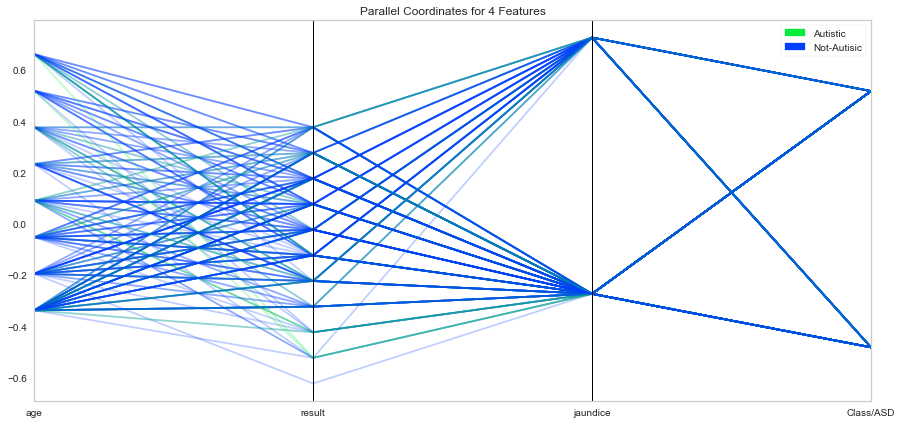

In [50]:
#Set the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

#Color for the yellowbrick visulizer
set_palette('sns_bright')

#Specify the features of interest and the classes of the target
classes = ['Not-Autisic', 'Autistic']
num_features = ['age', 'result', 'jaundice', 'Class/ASD']

#Copy data to a new dataframe
data_norm = data.copy()

#Normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

#Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.autism.values

#Visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      
visualizer.transform(X) 
visualizer.poof(outpath="pcoords2.png")

plt.show()

### Stacked Bar Charts

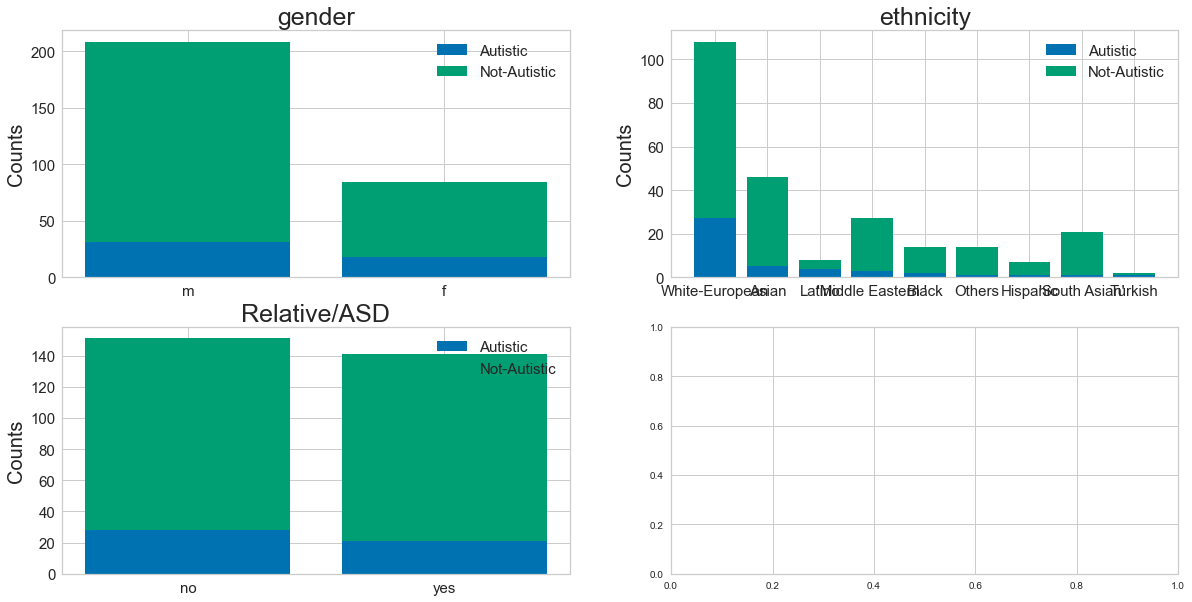

In [51]:
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)

#Color for the yellowbrick visulizer
set_palette('sns_colorblind')

#Create subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)


gender_autism = data.replace({'autism': {1: 'Autistic', 0: 'Not-Autistic'}})[data['autism']==1]['gender'].value_counts()
gender_not_autism = data.replace({'autism': {1: 'Autistic', 0: 'Not-Autistic'}})[data['autism']==0]['gender'].value_counts()
gender_not_autism = gender_not_autism.reindex(index = gender_autism.index)

#Gender Bar Plot
p1 = axes[0, 0].bar(gender_autism.index, gender_autism.values)
p2 = axes[0, 0].bar(gender_not_autism.index, gender_not_autism.values, bottom=gender_autism.values)
axes[0, 0].set_title('gender', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Autistic', 'Not-Autistic'), fontsize = 15)


ethnicity_autism = data.replace({'autism': {1: 'Autistic', 0: 'Not-Autistic'}})[data['autism']==1]['ethnicity'].value_counts()
ethnicity_not_autism = data.replace({'autism': {1: 'Autistic', 0: 'Not-Autistic'}})[data['autism']==0]['ethnicity'].value_counts()
ethnicity_not_autism = ethnicity_not_autism.reindex(index = ethnicity_autism.index)

#Ethnicity Bar Plot
p3 = axes[0, 1].bar(ethnicity_autism.index, ethnicity_autism.values)
p4 = axes[0, 1].bar(ethnicity_not_autism.index, ethnicity_not_autism.values, bottom=ethnicity_autism.values)
axes[0, 1].set_title('ethnicity', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Autistic', 'Not-Autistic'), fontsize = 15)


ASD_autism = data.replace({'autism': {1: 'Autistic', 0: 'Not-Autistic'}})[data['autism']==1]['relative/ASD'].value_counts()
ASD_not_autism = data.replace({'autism': {1: 'Autistic', 0: 'Not-Autistic'}})[data['autism']==0]['relative/ASD'].value_counts()
ASD_not_autism = ASD_not_autism.reindex(index = ASD_autism.index)

#ASD Autism/Not Autism Bar Plot
p5 = axes[1, 0].bar(ASD_autism.index, ASD_autism.values)
p6 = axes[1, 0].bar(ASD_not_autism.index, ASD_not_autism.values, bottom=ASD_autism.values)
axes[1, 0].set_title('Relative/ASD', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Autistic', 'Not-Autistic'), fontsize = 15)

plt.show()

### 3. Overview/Conclusion

Write a short overview/conclusion of the insights gained from your graphical analysis.

The histograms indicate that most of the subjects skew younger, with many aged 4. The result score, which is the overall screening score, skews toward scores with 5 or above, indicating higher prevalances of autism in the dat set. There is a nearly even split between subjects with family members who have autism and those who do not. Most subjects do not have jaundice.

The bar charts indicate that most subjects have not been diagosed with autism, but most that have been diagnosed with autism are male, and most are also white. Again, there is a nearly even split between subjects with family members who have autism and those who do not.

The first Pearson ranking looks for correlations between age, screening score, jaundice, and family members who have autism. There appears to be a high correlation between a high overall screening score and subjects who have a family member who has autism.

The second Pearson ranking looks for correlations between answer scores. There are moderate correlations between the A4 and A6 score, and the A4 and A9 score.

The stacked bar charts are an alternate way of viewing soome of the same information that can be read from the other visualizations.

## Milestone 2

In [52]:
#Feature Reduction (Extraction/Selection)
#Filling in Missing Values

#Fill in missing values and eliminate features and fill in the missing data with median value.
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['result'])

print(data['result'].describe())

count    292.000000
mean       6.239726
std        2.284882
min        0.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: result, dtype: float64


In [53]:
#Fill 'relation' NA with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('Parent', inplace=inplace)

fill_na_most(data['relation'])

print(data['relation'].describe())

count        292
unique         5
top       Parent
freq         257
Name: relation, dtype: object


In [54]:
#Fill 'ethnicity' with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('White-European', inplace=inplace)

fill_na_most(data['ethnicity'])


print(data['ethnicity'].describe())

count                292
unique                10
top       White-European
freq                 151
Name: ethnicity, dtype: object


In [55]:
#Import numpy
import numpy as np

#Log transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['result_log1p'] = log_transformation(data['result'])

print(data.describe())

         A1_Score    A2_Score    A3_Score    A4_Score    A5_Score    A6_Score  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.633562    0.534247    0.743151    0.551370    0.743151    0.712329   
std      0.482658    0.499682    0.437646    0.498208    0.437646    0.453454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         A7_Score    A8_Score    A9_Score   A10_Score         age    jaundice  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.606164    0.496575    0.493151    0.726027    6.369863    0.273973   
std      0.489438    0.5008

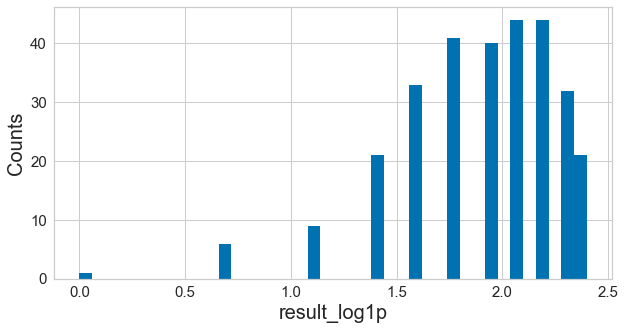

In [56]:
#Adjust skewed data (result), check the distribution using histogram
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['result_log1p'], bins=40)
plt.xlabel('result_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

plt.show()

In [57]:
#Convert categorical data to numbers and get the categorical data
cat_features = ['relative/ASD', 'gender']
data_cat = data[cat_features]

#One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

print(data_cat_dummies.head(8))

   relative/ASD_no  relative/ASD_yes  gender_f  gender_m
0                1                 0         0         1
1                1                 0         0         1
2                1                 0         0         1
3                1                 0         1         0
4                0                 1         0         1
5                1                 0         0         1
6                0                 1         0         1
7                0                 1         1         0


## Milestone 3

In [58]:
#Split_Train_Test
#Model Selection and Evaluation

#Combine the numerical features and the dummy features together
features_model = ['jaundice', 'age', 'result_log1p']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

In [61]:
#Create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'autism': {1: 'Autistic', 0: 'Not_Autistic'}})['autism']

#Separate data into training and validation and check the details of the datasets
# Import packages
from sklearn.model_selection import train_test_split

#Split the data
X_train, X_test, y_train, y_test = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [63]:
#Number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

#Autistic and not-autistic
print('\n')
print('No. of autistic and not-autistic in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of autistic and not-autistic in the validation set:')
print(y_test.value_counts())

No. of samples in training set:  204
No. of samples in validation set: 88


No. of autistic and not-autistic in the training set:
Not_Autistic    167
Autistic         37
Name: autism, dtype: int64


No. of autistic and not-autistic in the validation set:
Not_Autistic    76
Autistic        12
Name: autism, dtype: int64
